<a href="https://colab.research.google.com/github/saqibmobin/web_scraping/blob/master/Techolution_Job_Openings_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

In [0]:
#reads from csv file and stores as a dataframe
df = pd.read_csv('record.csv', encoding='utf-8')

In [26]:
#prints first 5 records of a dataframe
df.head()

,job_title,job_id,job_type,job_location,job_experience,business_unit,organisation,date_posted,posted_by,contact
0,Engineering Lead,1861,Full-time,Mauritius,7 - 18 Years,Cloud Automation - Mauritius,Techolution Mauritius,2019-02-08,Rekha Allam,rekha.allam@techolution.com
1,Machine Learning Engineer,1898,Full-time,Hyderabad,3 - 5 Years,FaceOpen,Techolution LLC,2019-02-14,Madhav Kommineni,madhav@techolution.com
2,Sr SDET,1903,Full-time,New York,3 - 10 Years,UI/UX Modernization - US,Techolution LLC,2019-02-14,Satish Kumar,satish.kumar@techolution.com
3,OSS DevOps Engineer,1905,Full-time,Hyderabad,6 - 12 Years,Cloud Automation - India,Techolution Pvt Ltd,2019-02-14,Pavan Kumar,pavan.thirunahari@techolution.com
4,Site Reliability Engineer,1945,Full-time,New York,1 - 3 Years,Cloud Automation - US,Techolution LLC,2019-02-20,Rajesh Sanathana,rajesh.s@techolution.com


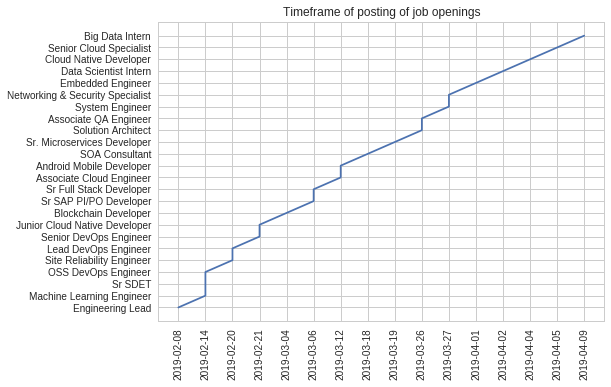

In [28]:
#Plotting posting date against job title to visualize when each job opening was posted
plt.plot(df.date_posted, df.job_title)
plt.xticks(rotation=90)
plt.title("Timeframe of posting of job openings")
plt.show()

In [6]:
#One hot encoding of job locations
one_hot = pd.get_dummies(df.job_location)
one_hot

,Delaware,Hyderabad,Mauritius,New Jersey,New York,Singapore,mauritius
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0
7,1,0,0,0,0,0,0
8,0,1,0,0,0,0,0
9,0,0,0,1,0,0,0


In [7]:
#Finding out number of jobs in each job location
count = one_hot.sum()
count = count[count>0]
count.sort_values(inplace=True)
count

Delaware       1
New Jersey     1
Singapore      1
mauritius      1
New York       2
Mauritius      3
Hyderabad     15
dtype: int64

In [0]:
#converting to dataframe
count = count.to_frame()

In [16]:
count.columns = ['No. of jobs','Location']
count.index.names = ['Location']
count

,No. of jobs,Location
Location,,
Delaware,1,Delaware
New Jersey,1,New Jersey
Singapore,1,Singapore
mauritius,1,mauritius
New York,2,New York
Mauritius,3,Mauritius
Hyderabad,15,Hyderabad


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


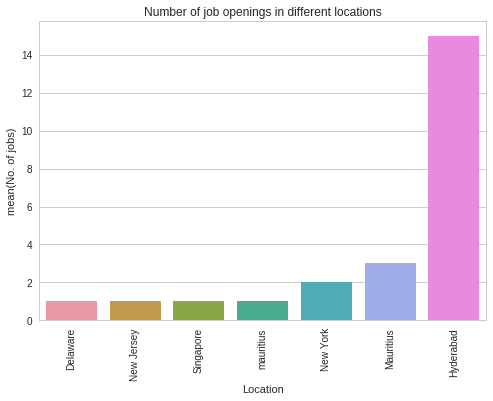

In [17]:
#Visualization of job openings in each location
sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='Location', y = 'No. of jobs', data = count)
plt.title("Number of job openings in different locations")
plt.xticks(rotation=90)
sns.plt.show()

In [18]:
#As hyderabad has the most number of job openings we will look further into it
hyd = df[df.job_location == 'Hyderabad']
hyd

,job_title,job_id,job_type,job_location,job_experience,business_unit,organisation,date_posted,posted_by,contact
1,Machine Learning Engineer,1898,Full-time,Hyderabad,3 - 5 Years,FaceOpen,Techolution LLC,2019-02-14,Madhav Kommineni,madhav@techolution.com
3,OSS DevOps Engineer,1905,Full-time,Hyderabad,6 - 12 Years,Cloud Automation - India,Techolution Pvt Ltd,2019-02-14,Pavan Kumar,pavan.thirunahari@techolution.com
5,Lead DevOps Engineer,1946,Full-time,Hyderabad,5 - 11 Years,Cloud Automation - India,Techolution Pvt Ltd,2019-02-20,Nikhil Shekhar,nick.shekhar@techolution.com
6,Senior DevOps Engineer,1947,Full-time,Hyderabad,3 - 10 Years,Cloud Automation - India,Techolution Pvt Ltd,2019-02-21,shravya reddy,shravya.reddy@techolution.com
8,Blockchain Developer,2003,Full-time,Hyderabad,1 - 4 Years,-,-,2019-03-04,Nikhil Shekhar,nick.shekhar@techolution.com
11,Associate Cloud Engineer,2075,Full-time,Hyderabad,0 - 3 Years,-,-,2019-03-12,Niharika Polepalli,niharika.polepalli@techolution.com
13,SOA Consultant,2110,Full-time,Hyderabad,0 - 1 Years,Cloud Automation - India,Techolution Pvt Ltd,2019-03-18,Pavan Kumar,pavan.thirunahari@techolution.com
14,Sr. Microservices Developer,2127,Full-time,Hyderabad,4 - 9 Years,UI/UX Modernization - India,Techolution Pvt Ltd,2019-03-19,Pavan Kumar,pavan.thirunahari@techolution.com
15,Solution Architect,2159,Full-time,Hyderabad,9 - 15 Years,-,-,2019-03-26,Niharika Polepalli,niharika.polepalli@techolution.com
16,Associate QA Engineer,2161,Full-time,Hyderabad,1 - 3 Years,-,-,2019-03-26,Niharika Polepalli,niharika.polepalli@techolution.com


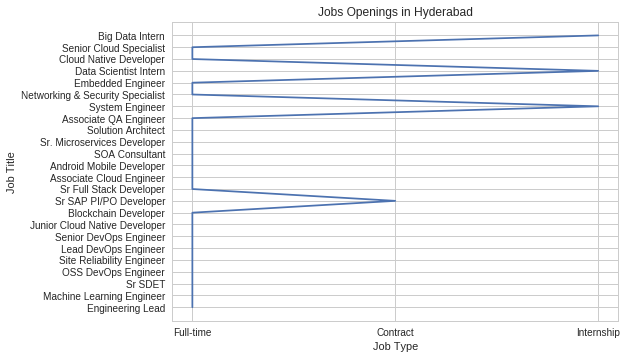

In [19]:
#Plotting job openings in hyderabad against the job type to get an insight about the openings
plt.plot(df.job_type, df.job_title)
plt.title('Jobs Openings in Hyderabad')
plt.xlabel('Job Type')
plt.ylabel('Job Title')
plt.show()

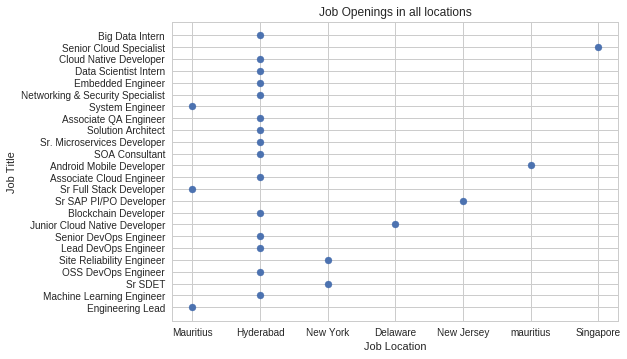

In [20]:
#Plotting Job Title against Job Location to get insight about which location has what job opening
plt.scatter(df.job_location, df.job_title)
plt.title("Job Openings in all locations")
plt.xlabel('Job Location')
plt.ylabel('Job Title')
plt.show()

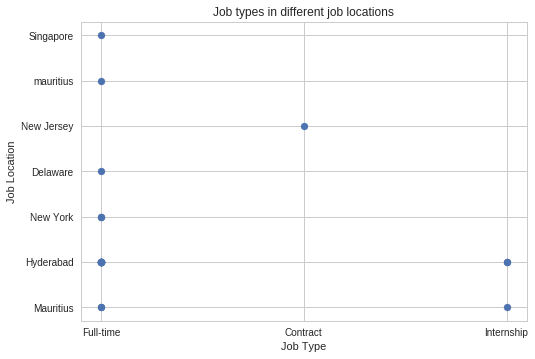

In [22]:
#Plotting Job Locations against Job Types to get insight on which location has which type of job opening
plt.scatter(df.job_type, df.job_location)
plt.title("Job types in different job locations")
plt.xlabel('Job Type')
plt.ylabel('Job Location')
plt.show()

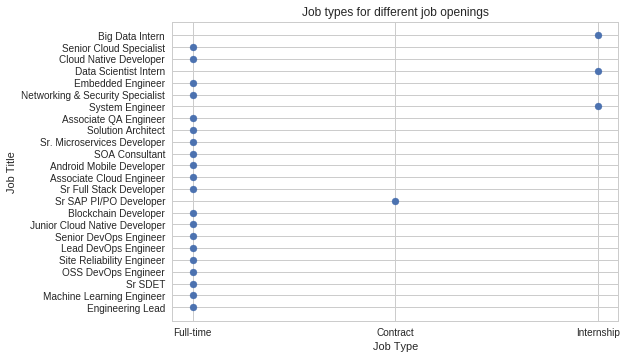

In [24]:
#Plotting Job Title against Job Types to get insight on which title has which type of job opening
plt.scatter(df.job_type, df.job_title)
plt.title("Job types for different job openings")
plt.xlabel('Job Type')
plt.ylabel('Job Title')
plt.show()